In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

In [2]:
# set defaults for matplotlib figures
plt.rc('font',size=13)
plt.rc('figure',figsize=(13,7))

In [3]:
df = wrangle.wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [4]:
train, validate, test = wrangle.train_validate_test(df)

train shape:  (81, 4) , validate shape:  (10, 4) , test shape:  (11, 4)

train percent:  79.0 , validate percent:  10.0 , test percent:  11.0


In [5]:
train.head()

,exam1,exam2,exam3,final_grade
43,93,90,96,97
90,70,75,78,72
19,92,89,94,93
36,58,65,70,68
18,79,70,85,81


# Continuous and Continuous

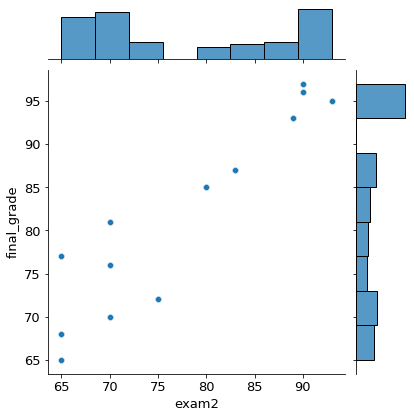

In [6]:
sns.jointplot(x='exam2',y='final_grade',data=train)

Takeaways
- Is there a stronger correlation between exams 1 and 3 and final grade compared to exam 2

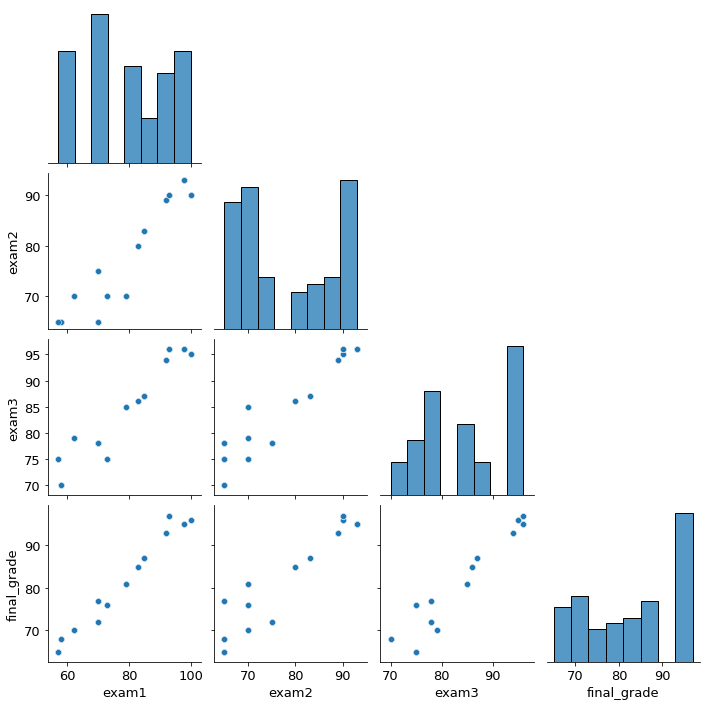

In [7]:
sns.pairplot(train, corner=True)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

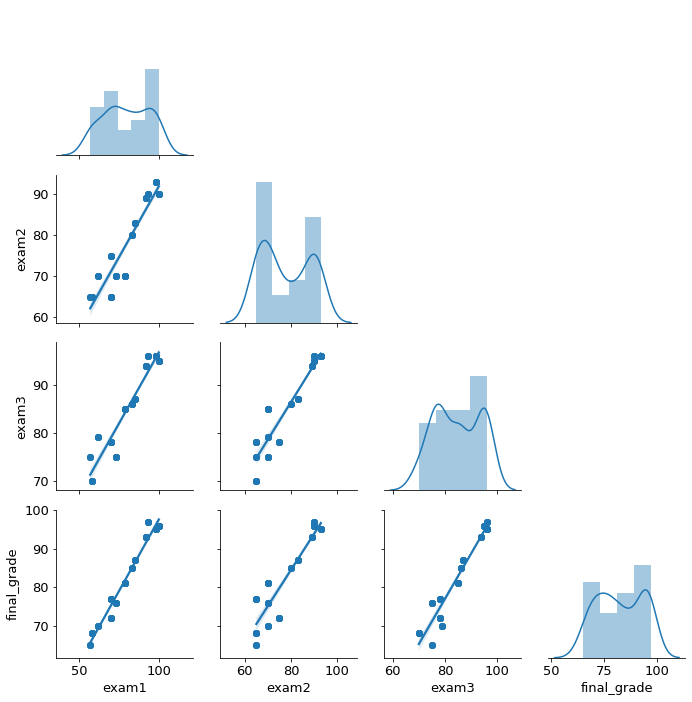

In [8]:
g = sns.PairGrid(train,corner=True)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

In [9]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.928333,0.956195,0.984024
exam2,0.928333,1.000000,0.931736,0.919179
exam3,0.956195,0.931736,1.000000,0.961942
final_grade,0.984024,0.919179,0.961942,1.000000


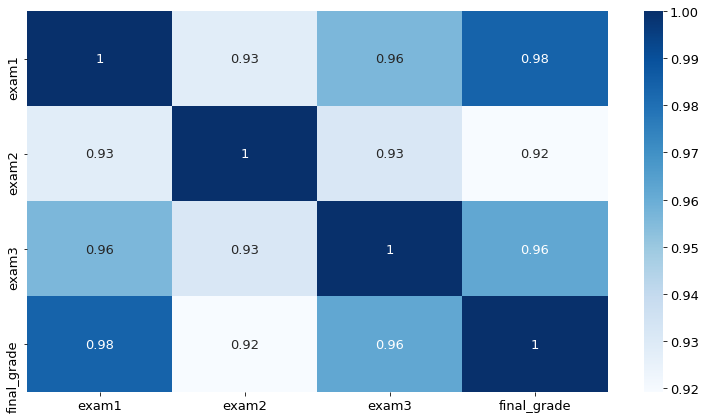

In [10]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways:

- exam 2 has the lowest correlation with final grade
- exam 1 has the hishest correlation with final grade

Questions:

- Why does exam 2 have a lower correlation
    - students are slacking midsemester
    - the material covered on the final isn't the same as what is covered in exam 2
    - the material covered midsemester is harder

# Continuous and Categorical

In [11]:
train['exam1_letters'] = pd.cut(train.exam1, bins =[0,70,80,90,105],labels=['D','C','B','A'])
train.head()

,exam1,exam2,exam3,final_grade,exam1_letters
43,93,90,96,97,A
90,70,75,78,72,D
19,92,89,94,93,A
36,58,65,70,68,D
18,79,70,85,81,C


Viz Types for cont. x categ.:
    
    - boxplot
    - bar chart
    - violin
    - swarm plot

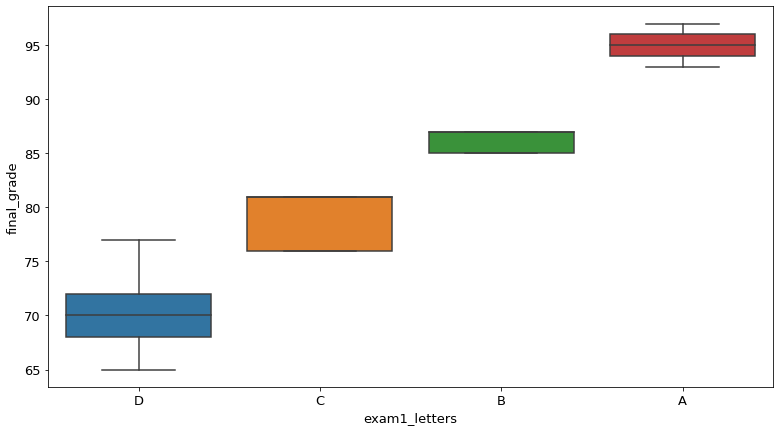

In [12]:
sns.boxplot(data=train, y = 'final_grade',x='exam1_letters')

Takeaways
- Students with D's have lowest grades, but highest variation
    - maybe because of study habits
    - maybe because of larger observations
- Bs have the least variation
    - maybe this is because fewer observations

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

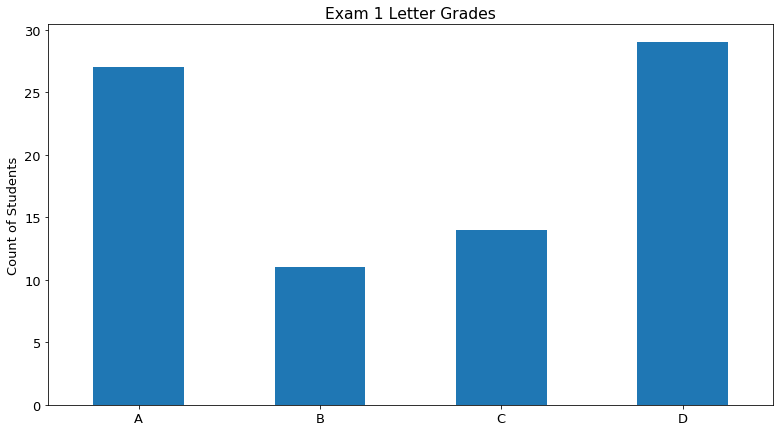

In [13]:
train.exam1_letters.value_counts().sort_index(ascending=False).plot.bar(title='Exam 1 Letter Grades')
plt.ylabel('Count of Students')
plt.xticks(rotation=0)

Takeaway: There's not significantly fewer observations in the b category, maybe this subgroup is ripe for research

In [17]:
np.random.seed(125)
# make a fake category
train['classroom'] = np.random.choice(['One','Two'], train.shape[0])
train.head()

,exam1,exam2,exam3,final_grade,exam1_letters,classroom
43,93,90,96,97,A,Two
90,70,75,78,72,D,Two
19,92,89,94,93,A,One
36,58,65,70,68,D,Two
18,79,70,85,81,C,Two


# Categorical and Categorical

(0, 100)

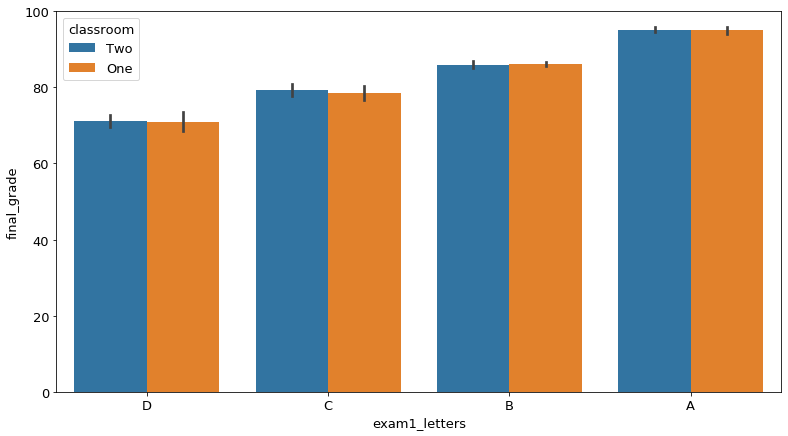

In [18]:
sns.barplot(data=train,y='final_grade',x='exam1_letters', hue='classroom')
plt.ylim(0,100)

- Takeaway: the distribution of grades in classroom one and classroom two are about the same
- Classroom doesn't impact final grade? Let's run a hypothesis test to check
    - $H_O$: There is no difference in final grade between classroom one and classroom two
    - $H_a$: There is a difference in final grade between classroom one and classroom two

In [19]:
# Two-sample, two-tailed T-Test

from scipy import stats

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var = False,
)

Ttest_indResult(statistic=-1.1578651591680404, pvalue=0.2504130925653015)

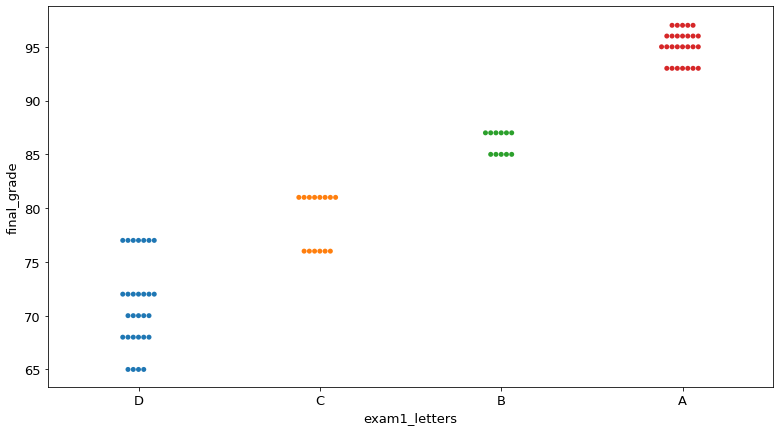

In [22]:
sns.swarmplot(data=train, y='final_grade',x='exam1_letters')

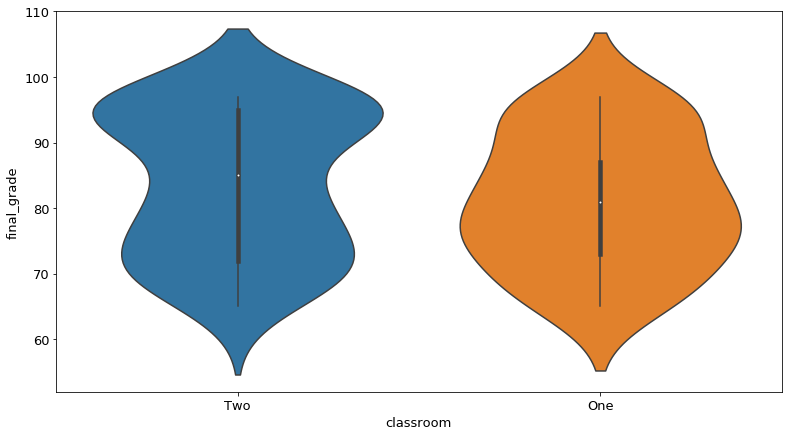

In [24]:
sns.violinplot(data=train, y='final_grade', x='classroom')

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


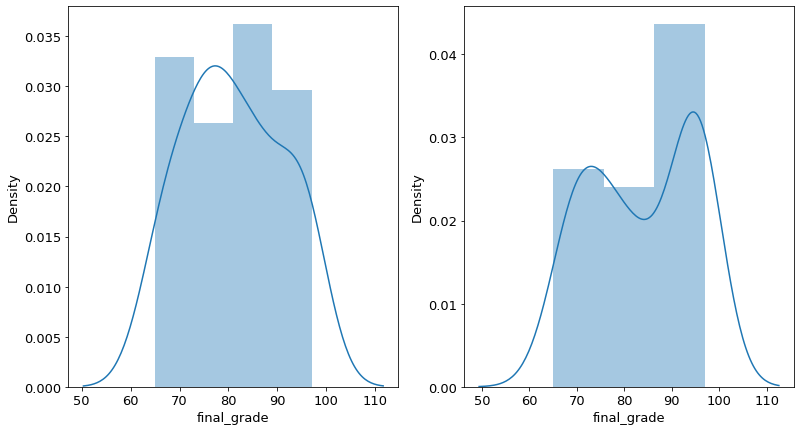

In [27]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

In [32]:
pd.crosstab(train.exam1_letters, train.classroom, normalize=True).round(3)

classroom,One,Two
exam1_letters,,
D,0.173,0.185
C,0.099,0.074
B,0.086,0.049
A,0.111,0.222


In [33]:
ctab = pd.crosstab(train.exam1_letters, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letters,,
D,17.3%,18.5%
C,9.9%,7.4%
B,8.6%,4.9%
A,11.1%,22.2%


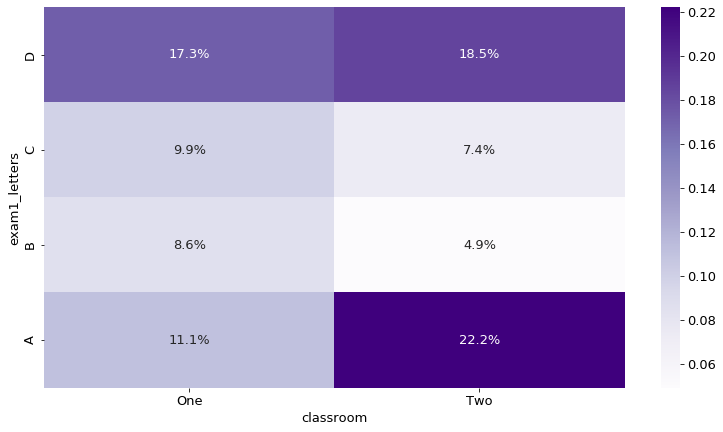

In [40]:
sns.heatmap(ctab,cmap='Purples', annot=True,fmt='.1%')

In [46]:
ctab = pd.crosstab(train.exam1_letters, train.classroom, normalize='index')
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letters,,
D,48.3%,51.7%
C,57.1%,42.9%
B,63.6%,36.4%
A,33.3%,66.7%


In [49]:
trans_ctab = pd.crosstab(train.classroom, train.exam1_letters, normalize='columns')
trans_ctab.applymap('{:.1%}'.format)

exam1_letters,D,C,B,A
classroom,,,,
One,48.3%,57.1%,63.6%,33.3%
Two,51.7%,42.9%,36.4%,66.7%


- Normalize = true vs normalize = 'columns' or 'index'
- what percentage of observations fall into the intersection of these categories
    - normalize = True
- of each subgroup, what percentage of observations fall into the other subgroup
    - normalize = 'columns' or 'index'